
## Коэффициент силуэта. Практика

### <b><span style='color:#686dec'>Загружаем данные</span></b>

 спользуем уже знакомый нам датасет <code>make_blobs</code>


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from itertools import cycle, islice

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [2]:
# Визуализируем исходные данные
def plot_scatter():
    plt.rcParams['figure.figsize'] = 3, 3
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], s=10,ec='k',alpha=0.25,color=colors[y_pred])

### <b><span style='color:#686dec'>Пример Кластеризации</span></b>

`Коэффициент силуэта` можно посчитать при помощи реализации из библиотеки `sklearn`

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
y_pred

array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

### <b><span style='color:#686dec'>Параметры Метода</span></b>

В качестве параметров в функции `silhouette_score` используются:
   
- `X` — массив признаков объектов выборки или массив попарных расстояний между объектами;
- `Y` — массив предсказанных кластеров для объектов выборки;
- `metric` — метрика, используемая для вычисления расстояния между объектами, мы будем использовать euclidean (Евклидово расстояние)

In [4]:
# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=y_pred, metric='euclidean')

0.5131660482634046

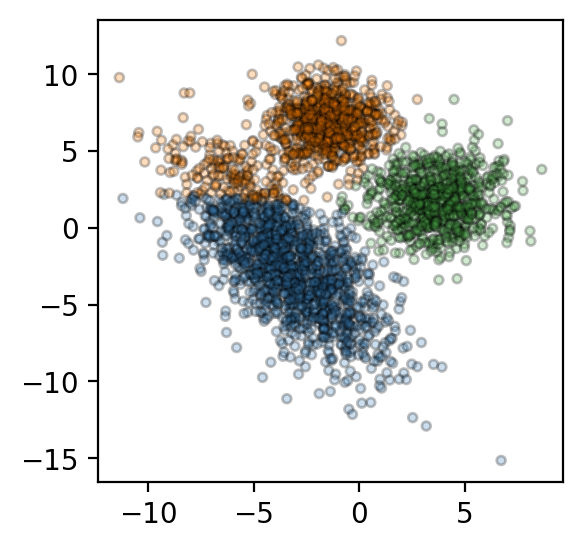

In [5]:
plot_scatter()

### <b><span style='color:#686dec'>Задание</span></b>

#### <b>Задание <span style='color:#F1A424'>4.11.1</span></b> 

Обучите модель `GaussianMixture` с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета. Посчитайте `коэффициент силуэта` для получившейся кластеризации

In [6]:
from sklearn.mixture import GaussianMixture as GM
from sklearn.metrics import silhouette_score

gm = GM(n_components=3,random_state=42)
y_pred = gm.fit_predict(X)
y_pred

array([1, 1, 1, ..., 0, 2, 0])

In [7]:
silhouette_score(X,y_pred,metric='euclidean')

0.3988405457243407

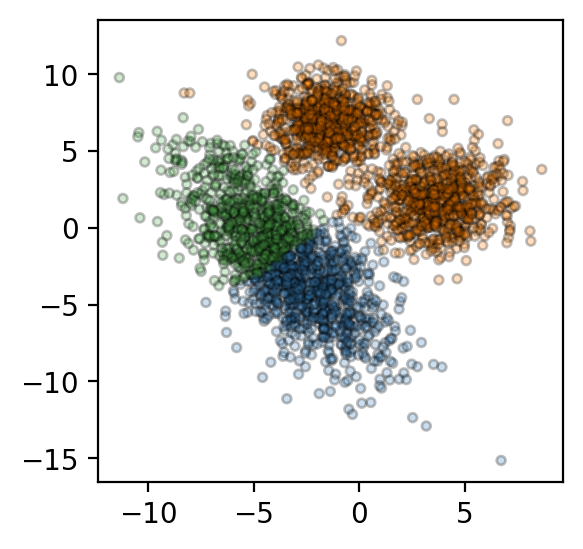

In [8]:
plot_scatter()

#### <b>Задание <span style='color:#F1A424'>4.11.2</span></b> 

Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи `коэффициента силуэта`, инициализируйте алгоритмы со следующими параметрами:

- `K-means` — n_clusters=3, random_state=42
- `EM-алгоритм` (GaussianMixture) — n_components=3, random_state=42
- `Агломеративная` кластеризация – n_clusters=3
- `DBSCAN` – eps=0.9, min_samples=35


Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей

In [9]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# K-Means
kmeans = KMeans(n_clusters=3,
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
print('kmeans',sil)

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
print('gm',sil)

# Agglomerative Cluster
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
print('agglomerative',sil)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
print('dbscan',sil)

kmeans 0.5131660482634046
gm 0.3988405457243407
agglomerative 0.4811992210663849
dbscan 0.4454335539277996


#### <b>Задание <span style='color:#F1A424'>4.11.3</span></b> 

Подберите оптимальное количество кластеров с помощью `коэффициента силуэта`. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: `K-means`, `EM-алгоритм` и `агломеративная кластеризация`.

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от **2 до 10** включительно. Для K-means и EM-алгоритма установите значение random_state=42.

В качестве ответа через пробел введите число кластеров, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.



In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

lst_clusters = [i for i in range(2,11)]

max_sil = [-777,-777,-777]
opt_cluster = [-777,-777,-777]
for n_cluster in lst_clusters:
    
    print('\nclusters',n_cluster)

    # K-Means
    kmeans = KMeans(n_clusters=n_cluster,
                    random_state=42)
    kmeans.fit(X)
    y_pred = kmeans.labels_
    sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if(sil > max_sil[0]):
        print('kmeans',n_cluster, round(sil,4))
        max_sil[0] = sil
        opt_cluster[0] = n_cluster

    # Gaussian Mixture
    em_gm = GaussianMixture(n_components=n_cluster, 
                            random_state=42)
    em_gm.fit(X)       
    y_pred = em_gm.predict(X)
    sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if(sil > max_sil[1]):
        print('gm',n_cluster, round(sil,4))
        max_sil[1] = sil
        opt_cluster[1] = n_cluster

    # Agglomerative Cluster
    ac = AgglomerativeClustering(n_clusters=n_cluster)
    ac.fit(X)
    y_pred = ac.labels_.astype(np.int)
    sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if(sil > max_sil[2]):
        print('agglomerative',n_cluster, round(sil,4))
        max_sil[2] = sil
        opt_cluster[2] = n_cluster

print('optimum number of clusters:',opt_cluster)


clusters 2
kmeans 2 0.4553
gm 2 0.4551
agglomerative 2 0.4056

clusters 3
kmeans 3 0.5132
agglomerative 3 0.4812

clusters 4
gm 4 0.5107
agglomerative 4 0.4847

clusters 5

clusters 6

clusters 7

clusters 8

clusters 9

clusters 10
optimum number of clusters: [3, 4, 4]
